# Utility notebook to split the data set into smaller training and dev sets

In [1]:
import os
import pandas as pd
import numpy as np
import math

from matplotlib import pyplot as plt
%matplotlib inline

from dataset_processing import partition_images

Read in the labels the labels and get some general numbers

In [2]:
IDENTIFIER_LABEL = 'breed'

In [3]:
df_labels = pd.read_csv('./input/labels.csv')

breeds = df_labels.breed.unique()
print('total breeds ' + str(breeds.size))

print(df_labels.groupby([IDENTIFIER_LABEL]).agg(['count']))

total breeds 120
                                  id
                               count
breed                               
affenpinscher                     80
afghan_hound                     116
african_hunting_dog               86
airedale                         107
american_staffordshire_terrier    74
appenzeller                       78
australian_terrier               102
basenji                          110
basset                            82
beagle                           105
bedlington_terrier                89
bernese_mountain_dog             114
black-and-tan_coonhound           77
blenheim_spaniel                 102
bloodhound                        85
bluetick                          85
border_collie                     72
border_terrier                    91
borzoi                            75
boston_bull                       87
bouvier_des_flandres              86
boxer                             75
brabancon_griffon                 67
briard               

Create a very small train/dev set with bluetick and collie

In [4]:
df_count = df_labels.groupby([IDENTIFIER_LABEL]).agg(['count'])

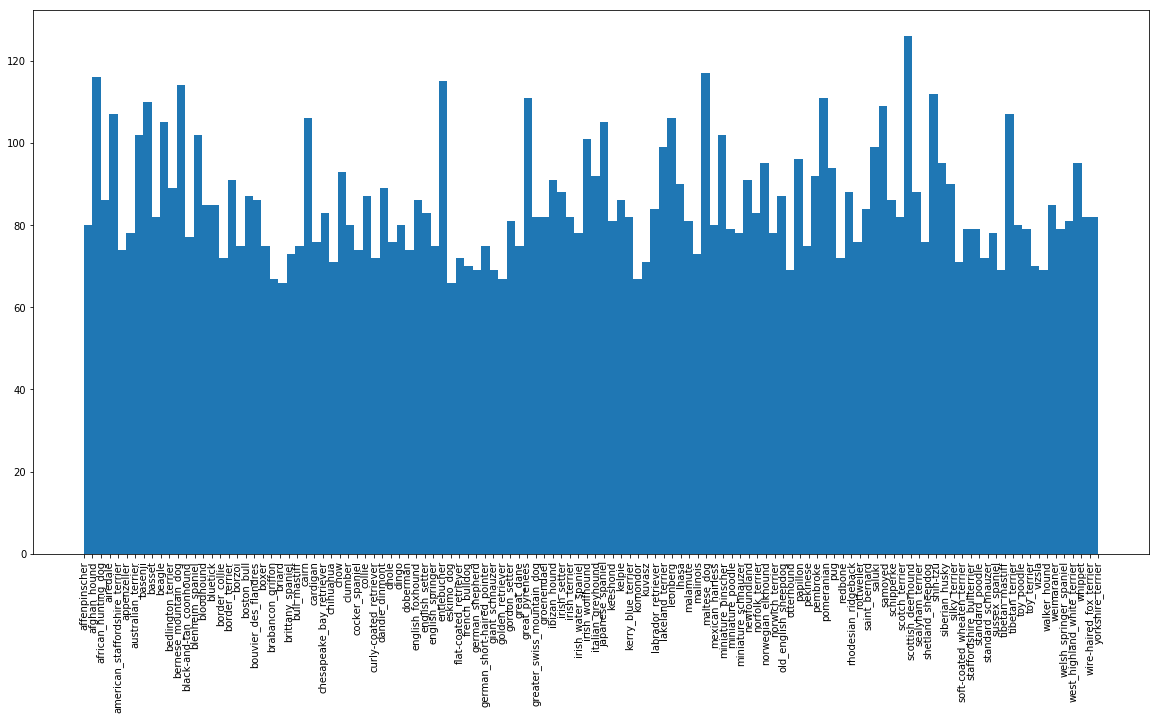

In [5]:
plt.hist(df_labels.breed, bins=120)
plt.xticks(rotation=90)
plt.autoscale(enable=True)
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.show()

In [6]:
very_small_list = ['bluetick', 'collie']

partition_images(df_labels, identifier_label=IDENTIFIER_LABEL, label_postfix='very_small', target_dir='./input', filter_identity=very_small_list)

Split into training and dev sets
Training set in ./input/labels_train_very_small.csv
            id
         count
breed         
bluetick    68
collie      69
Dev set in ./input/labels_dev_very_small.csv
            id
         count
breed         
bluetick    17
collie      18


Create a list that contains 6 dog breeds
2 of the breeds are difficult to distinguish (for my untrained eye) - weimaraner and germain_short-haired_pointer

In [7]:
small_list = ['bluetick', 'weimaraner', 'labrador_retriever', 'basset', 'german_short-haired_pointer', 'collie']
partition_images(df_labels, identifier_label=IDENTIFIER_LABEL, label_postfix='small', target_dir='./input', filter_identity=small_list)

Split into training and dev sets
Training set in ./input/labels_train_small.csv
                               id
                            count
breed                            
basset                         65
bluetick                       68
collie                         69
german_short-haired_pointer    60
labrador_retriever             67
weimaraner                     68
Dev set in ./input/labels_dev_small.csv
                               id
                            count
breed                            
basset                         17
bluetick                       17
collie                         18
german_short-haired_pointer    15
labrador_retriever             17
weimaraner                     17


Create the full list

In [8]:
partition_images(df_labels, identifier_label=IDENTIFIER_LABEL, label_postfix='full', target_dir='./input', filter_identity=[])

Split into training and dev sets
Training set in ./input/labels_train_full.csv
                                  id
                               count
breed                               
affenpinscher                     64
afghan_hound                      92
african_hunting_dog               68
airedale                          85
american_staffordshire_terrier    59
appenzeller                       62
australian_terrier                81
basenji                           88
basset                            65
beagle                            84
bedlington_terrier                71
bernese_mountain_dog              91
black-and-tan_coonhound           61
blenheim_spaniel                  81
bloodhound                        68
bluetick                          68
border_collie                     57
border_terrier                    72
borzoi                            60
boston_bull                       69
bouvier_des_flandres              68
boxer                            